In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
%matplotlib inline

In [2]:
import matplotlib


In [3]:
import tsfresh

In [4]:
#import pyeeg

In [5]:
#Load the Data
df = pd.read_csv("data/Seizure_data.csv")
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


## Exploratory Data Analysis

In [6]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [7]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [9]:
df.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [10]:
df['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

In [11]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1:]


In [12]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [13]:
y

,y
0,4
1,1
2,5
3,5
4,5
...,...
11495,2
11496,1
11497,5
11498,3


In [14]:
#make a data frame for the epileptic waves and the non epileptic waves
import matplotlib.pyplot as plt

df_pos = df[df["y"] == 1]
df_pos = df_pos.drop(columns = ["y"])
df_neg = df[df["y"] > 1]
df_neg = df_neg.drop(columns = ["y"])



In [15]:
print(len(df_pos))

2300


In [16]:
print(len(df_neg))

9200


In [17]:
df_pos.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,168,164,150,146,152,157,156,154,143,129
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-386,-400,-379,-336,-281,-226,-174,-125,-79,-40
11,X21.V1.724,-167,-230,-280,-315,-338,-369,-405,-392,-298,...,415,423,434,416,374,319,268,215,165,103
20,X23.V1.964,410,451,491,541,581,641,736,757,692,...,409,415,428,463,510,562,607,667,748,763
22,X11.V1.134,-264,-189,-117,-45,20,70,111,143,161,...,-227,-231,-221,-248,-321,-444,-530,-548,-536,-486


In [18]:
df_neg.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-6,-12,-31,-42,-54,-60,-64,-60,-56,-55


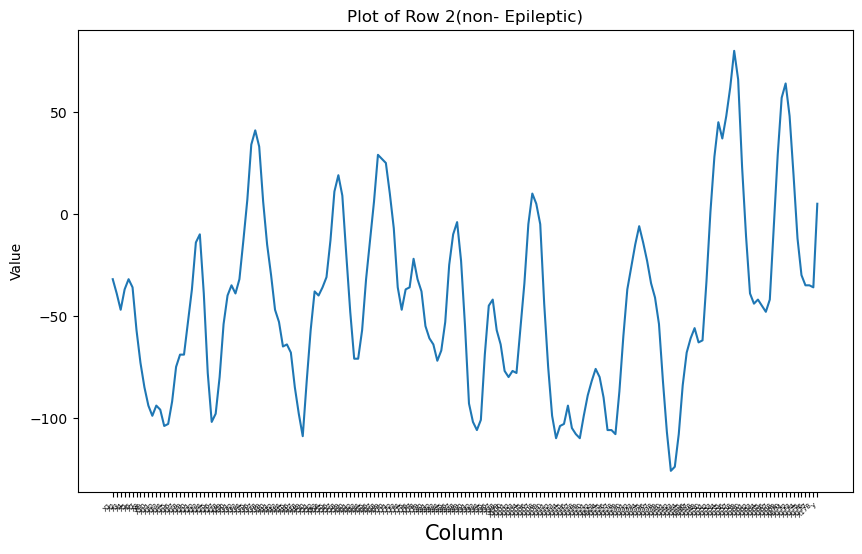

In [19]:
row_index = 2  # Index of the row you want to plot
row_to_plot = df.iloc[row_index]
plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45, ha='right', fontsize = 5)
# Plot the row data
plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Column', fontsize = 15)
plt.ylabel('Value')
plt.title(f'Plot of Row {row_index}(non- Epileptic)')
plt.show()

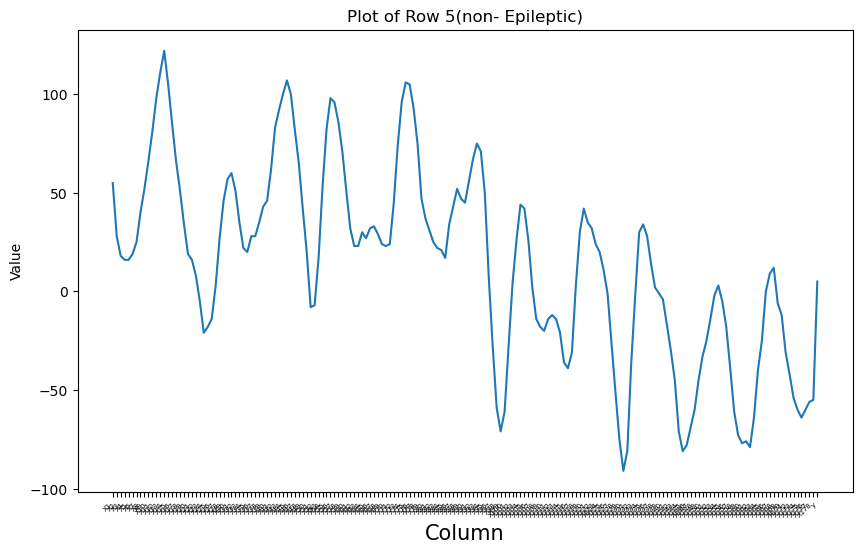

In [20]:
row_index = 5  # Index of the row you want to plot
row_to_plot = df.iloc[row_index]
plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45, ha='right', fontsize = 5)
# Plot the row data
plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Column', fontsize = 15)
plt.ylabel('Value')
plt.title(f'Plot of Row {row_index}(non- Epileptic)')
plt.show()

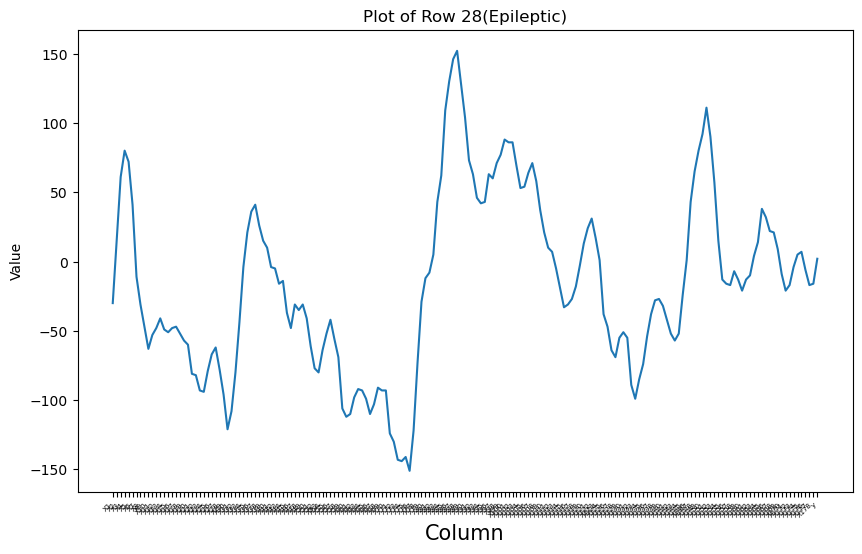

In [21]:
row_index = 28  # Index of the row you want to plot
row_to_plot = df.iloc[row_index]
plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45, ha='right', fontsize = 5)
# Plot the row data
plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Column', fontsize = 15)
plt.ylabel('Value')
plt.title(f'Plot of Row {row_index}(Epileptic)')
plt.show()

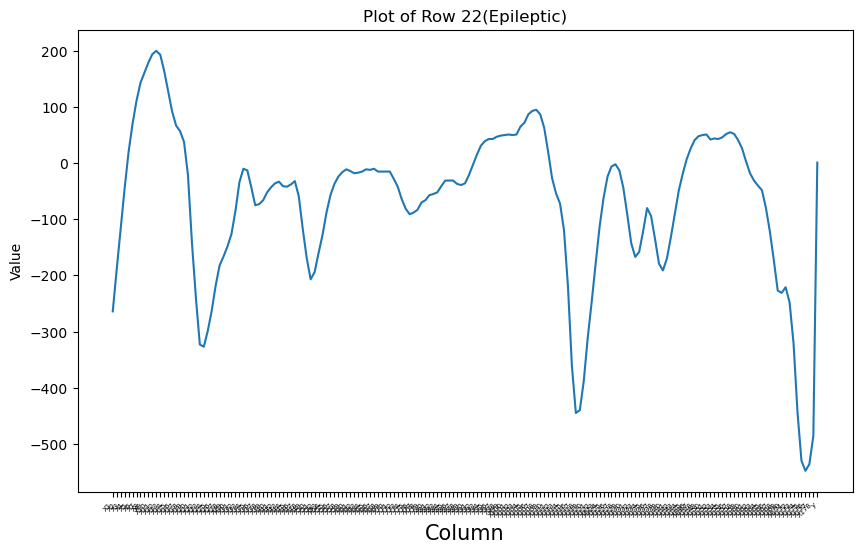

In [22]:
row_index = 22  # Index of the row you want to plot
row_to_plot = df.iloc[row_index]
plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45, ha='right', fontsize = 5)
# Plot the row data
plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Column', fontsize = 15)
plt.ylabel('Value')
plt.title(f'Plot of Row {row_index}(Epileptic)')
plt.show()

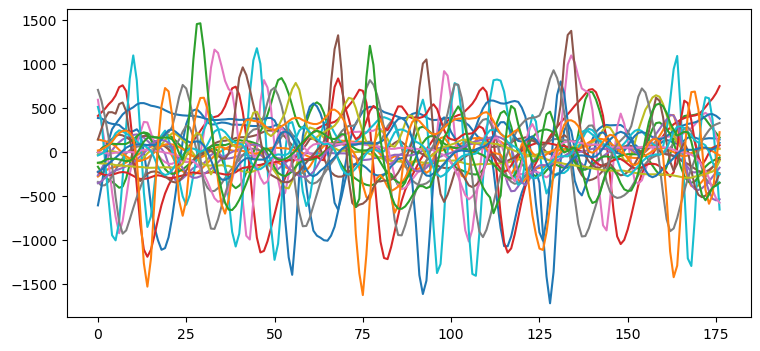

In [23]:
plt.figure(figsize=(30,4))
plt.subplot(131)
[plt.plot(df_pos.values[i][1:-1]) for i in range(23)];

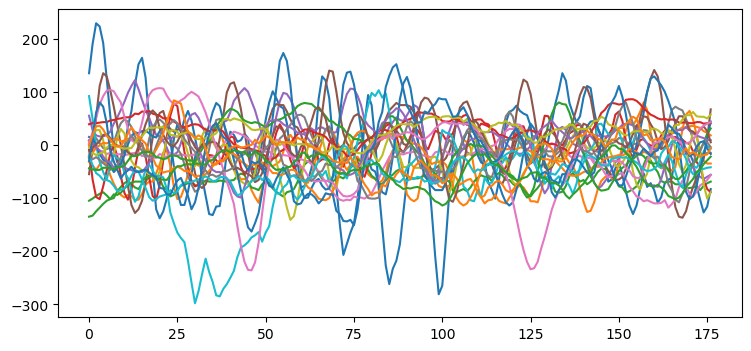

In [24]:
plt.figure(figsize=(30,4))
plt.subplot(131)
[plt.plot(df_neg.values[i][1:-1]) for i in range(23)];

In [25]:
dfb = df.copy()
y= dfb[['Unnamed','y']]
X = dfb.drop(columns = ['y'])

In [26]:
# Remove X from column names to more easily sort by numbered order
X.columns = X.columns.str.replace('X', '')
# Add new column of binary classificaiton of seizure
y['binary_y'] = np.where(y['y'] == 1, 1, 0)
y_ = y[['Unnamed','binary_y']]

/var/folders/k2/1ykbcp611qbd8z1t049y10580000gn/T/ipykernel_2799/1234147161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['binary_y'] = np.where(y['y'] == 1, 1, 0)


In [27]:
X_ = X.melt(id_vars= 'Unnamed', 
        var_name="Time", 
        value_name="Value")

In [28]:
X_['Time'] = pd.to_numeric(X_['Time']) #
X_.sort_values(['Unnamed','Time'], inplace=True)
y_.sort_values(['Unnamed'], inplace=True)
y_ = y_.set_index('Unnamed')

/var/folders/k2/1ykbcp611qbd8z1t049y10580000gn/T/ipykernel_2799/567062923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_.sort_values(['Unnamed'], inplace=True)


In [42]:
X_
y_


,binary_y
Unnamed,
X1.V1,0
X1.V1.1,0
X1.V1.10,0
X1.V1.101,0
X1.V1.102,0
...,...
X9.V1.994,1
X9.V11,0
X9.V12,0


In [30]:
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_relevant_features

In [31]:
df_X_features = extract_relevant_features(X_, y_['binary_y'], column_id = "Unnamed", column_sort='Time', column_value="Value")

Feature Extraction: 100%|███████████████████████| 20/20 [01:47<00:00,  5.36s/it]


In [40]:
df_X_features
#df_X_features.to_csv('Data/extracted_features.csv')

In [33]:
# Setup X and y dateframes to begin modelling
X_for_modeling = df_X_features
y_for_modeling = y_['binary_y']

In [34]:
# Now you can start you Model classification using the X and Y from above

In [35]:
X_for_modeling

,"Value__fft_coefficient__attr_""abs""__coeff_57","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4",...,Value__index_mass_quantile__q_0.3,"Value__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.6",Value__autocorrelation__lag_1,Value__partial_autocorrelation__lag_1,Value__index_mass_quantile__q_0.2,"Value__fft_coefficient__attr_""real""__coeff_37",Value__symmetry_looking__r_0.15000000000000002,"Value__fft_coefficient__attr_""angle""__coeff_75","Value__fft_coefficient__attr_""angle""__coeff_67",Value__first_location_of_maximum
X1.V1,51.007234,31.764922,7.151515,82.908173,18.198400,4.960000,42.025600,81.433594,36.649730,95.252729,...,0.264045,0.030303,0.931450,0.931450,0.168539,-50.226949,1.0,0.304850,40.090555,0.033708
X1.V1.1,34.101047,130.020031,13.564516,313.170916,36.620499,9.894737,127.036011,227.759810,114.689553,267.984483,...,0.168539,0.919355,0.936497,0.936497,0.123596,-42.419438,1.0,-90.993816,46.038087,0.713483
X1.V1.10,49.015052,47.664399,8.714286,123.391282,19.700000,6.000000,54.490000,122.763377,53.490638,146.832075,...,0.365169,0.460317,0.970434,0.970434,0.264045,21.754051,1.0,169.609464,179.245104,0.252809
X1.V1.101,195.903449,541.369722,28.383333,1339.960833,91.200617,15.277778,323.496914,1180.743484,598.716037,1579.549371,...,0.258427,2.650000,0.906939,0.906939,0.191011,-9.786756,1.0,157.488121,146.042618,0.314607
X1.V1.102,13.422923,5.546485,3.238095,15.773747,2.355372,2.090909,6.429752,16.860969,5.870405,14.936183,...,0.157303,-0.507937,0.905405,0.905405,0.117978,54.038435,1.0,-42.996532,-172.186013,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X9.V1.994,299.343498,1472.605917,51.384615,4098.191716,1164.737240,49.043478,2920.858223,1996.112222,2266.409600,6143.945600,...,0.353933,-3.846154,0.966713,0.966713,0.230337,117.295530,1.0,20.425142,-61.865002,0.359551
X9.V11,54.302423,56.764828,11.096774,178.700312,64.338843,11.545455,195.776860,110.938889,86.105900,235.167500,...,0.264045,1.096774,0.946817,0.946817,0.207865,-49.948844,1.0,-128.386673,158.315126,0.544944
X9.V12,36.967458,26.227755,6.171429,64.314286,6.800000,3.000000,15.728889,94.902344,26.124183,66.225682,...,0.247191,0.000000,0.982084,0.982084,0.162921,59.336896,1.0,10.515178,38.680461,0.617978
X9.V13,40.532085,9.818115,3.796875,23.695068,7.155325,3.192308,17.332840,18.420898,9.365748,22.036663,...,0.213483,-0.734375,0.961505,0.961505,0.117978,47.873480,1.0,26.931311,-64.349919,0.011236


In [36]:
X_for_modeling.columns


Index(['Value__fft_coefficient__attr_"abs"__coeff_57',
       'Value__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.6',
       'Value__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.6',
       'Value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.6',
       'Value__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.6',
       'Value__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.6',
       'Value__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.6',
       'Value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.8',
       'Value__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.4',
       'Value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.4',
       ...
       'Value__index_mass_quantile__q_0.3',
       'Value__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.6',
       'Value__autocorrelation__lag_1',
       'Value__partial_autocorrelation__lag_1',
       'Value__index_mass_quantile__q_0.2',


In [37]:
import seaborn as sns
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [45]:
#Model 1
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
X = X_for_modeling
y = y_for_modeling

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = .3, 
                                                    random_state =42)



<IPython.core.display.Javascript object>

In [46]:
model = LogisticRegression(random_state=42)

In [47]:
model.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [51]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
print(y_hat_train)
print(y_hat_test)

[1 1 0 ... 0 1 1]
[0 1 0 ... 0 0 0]


In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test))

0.9582608695652174

In [54]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2763
           1       0.94      0.84      0.89       687

    accuracy                           0.96      3450
   macro avg       0.95      0.91      0.93      3450
weighted avg       0.96      0.96      0.96      3450

